<a href="https://colab.research.google.com/github/Franco-Urrutia-G/EIE401-1s-2024/blob/main/Actividad_1_UrrutiaFranco_189167628.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 1</h2></center>
<center><h3>Fundamentos</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Franco Urrutia</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Crea tu perfil y un repositorio para las actividades del curso en Github
<p align="justify">
Tanto en el mercado laboral como a nivel de investigación científica, se ha normalizado el uso de herramientas de desarrollo continuo (CI/CD), entre las que se cuenta a GitHub.

<p align="justify">
Debes crear tu cuenta y primer repositorio en GitHub.

El respositorio deberá tener un archivo README y subcarpetas para las actividades del semestre. Allí deberás alojar el archivo de Jupyter Notebook con el código y todos los recursos para la posterior revisión de tu trabajo.
    
Este medio será el canal de entrega de tus actividades cada semana, de tal forma que al final del curso debes tener un portafolio de tu trabajo para presentar a tus colegas o en la industria.
    
    

In [1]:
# Franco-Urrutia-G
# https://github.com/Franco-Urrutia-G/EIE401-1s-2024?tab=readme-ov-file

## 2. Define en python vectores y funciones
<p align="justify">
Debes generar vectores que representan intervalos de tiempo o de una variable.
Debes ingresar las funciones matemáticas y evaluarlas en los vectores generados.

$$
f(x) =  e^{-x^2}
$$

$$
f(z) =  ysin(x)
$$

<p align="justify">
Haz una gráfica para cada uno de las funciones evaluadas.
    
    

Text(0, 0.5, 'f(z)')

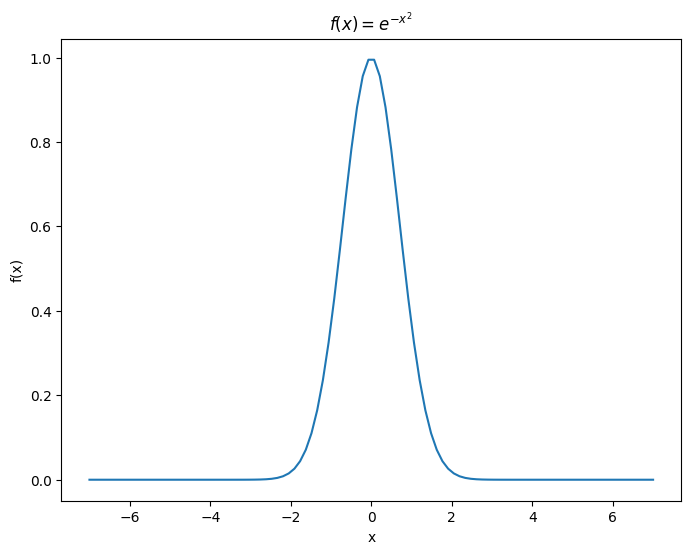

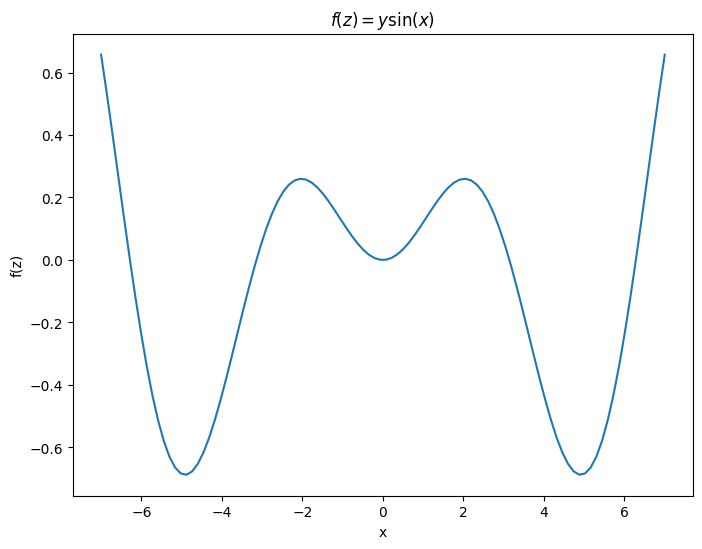

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Se definen las funciones
def fx(x):
    return np.exp(-x**2)


def f_z(y, x):
    return y * np.sin(x)

# Vector de x (variable temporal)
x = np.linspace(-7, 7, 100)  # (desde, hasta, N puntos)

# Vector de y
y = np.linspace(-1, 1, 100)

# evaluar fx
fx = fx(x)

# Se evalua fz tomando en cuenta todas las posibles combinaciones
#de x e y en el intervalo (N puntos discretos)
fz = f_z(y, x)

# Grafica f(x)
plt.figure(figsize=(8, 6))
plt.plot(x, fx, label=r'$f(x) = e^{-x^2}$')
plt.title('$f(x) = e^{-x^2}$')
plt.xlabel('x')
plt.ylabel('f(x)')


# Grafica f(z)
plt.figure(figsize=(8, 6))
plt.plot(x, fz, label=r'$f(z) = y \sin(x)$ ')
plt.title('$f(z) = y \sin(x)$')
plt.xlabel('x')
plt.ylabel('f(z)')


## 3. Ruido
<p align="justify">
Crear una señal (senoidal, cosenoidal, etc) y demuestra la agregación de ruido.
    


Text(0.5, 1.0, 'Seno')

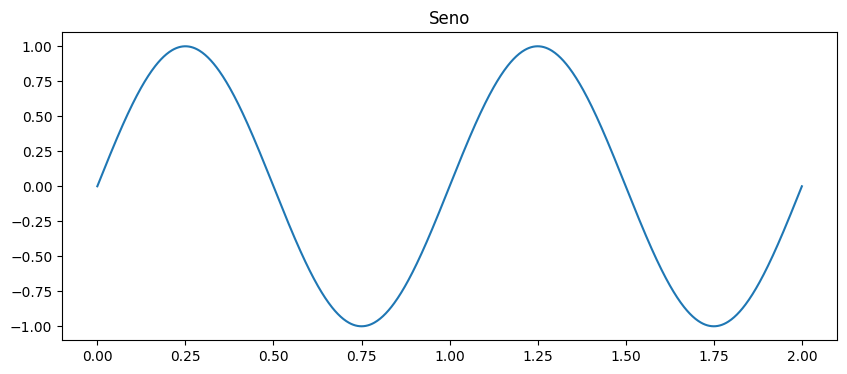

In [2]:

# Vector de tiempo para dos ciclos
t = np.linspace(0, 2, 1000)
# Señal senoidal
seno = np.sin(2*np.pi*t)

# Grafica seno
plt.figure(figsize=(10, 4))
plt.plot(t, seno, label='Seno')
plt.title("Seno")


### 3.1 Ruido Gaussiano
Debes agregar la señal de ruido a la que creaste previamente. Adicionalmente, debes mostrar una gráfica con el resultado.


Text(0.5, 1.0, 'Señal con ruido')

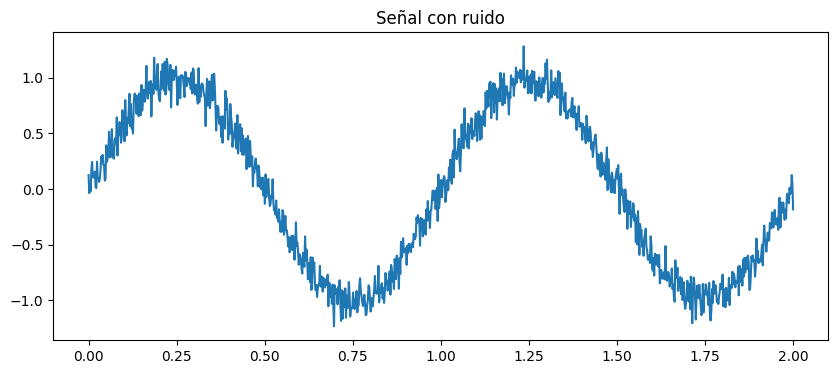

In [3]:
# Parámetros
media = 0 #definción ruido gausiano
desviacion_estandar = 0.1 #amplitudes del ruido

# Generar el ruido gaussiano
ruido = np.random.normal(media, desviacion_estandar, 1000)

#
nueva = seno + ruido

plt.figure(figsize=(10, 4))
plt.plot(t, nueva, label='Señal con ruido')
plt.title("Señal con ruido")

### 3.2 Ruido Rosa
Investiga en que consiste el ruido rosa, cual es la diferencia del ruido gaussiano y demuéstralo.


**Ruido Gaussiano:** El ruido gaussiano se distingue por su forma de distribución, que coincide con una distribución normal (también conocida como gaussiana). En este caso, las magnitudes de ruido se distribuyen en una curva con forma de campana, donde la mayoría de los valores se agrupan alrededor de un punto central (la media). La distribución disminuye gradualmente y simétricamente en ambos lados de la media. El ruido gaussiano suele describirse utilizando su media (generalmente cero) y su desviación estándar, que indica la amplitud de las fluctuaciones del ruido. Es habitual emplear el ruido gaussiano para representar fluctuaciones aleatorias en diversos sistemas, como circuitos eléctricos, canales de comunicación y errores de medición.

**Ruido Rosa (Ruido 1/f o Ruido de Parpadeo)** El ruido rosa es un sonido que reduce su intensidad a medida que el tono se vuelve más alto. Se le llama "rosa" porque suena similar a una variedad de ruidos naturales, como el viento y la lluvia.
En comparación con el ruido blanco (que tiene la misma intensidad en todos los tonos) y el ruido rojo (que tiene una intensidad menor en los tonos más altos), el ruido rosa se encuentra en el medio, donde la intensidad es inversamente proporcional al tono. Esto significa que tiene más intensidad en los tonos bajos que en los tonos altos.

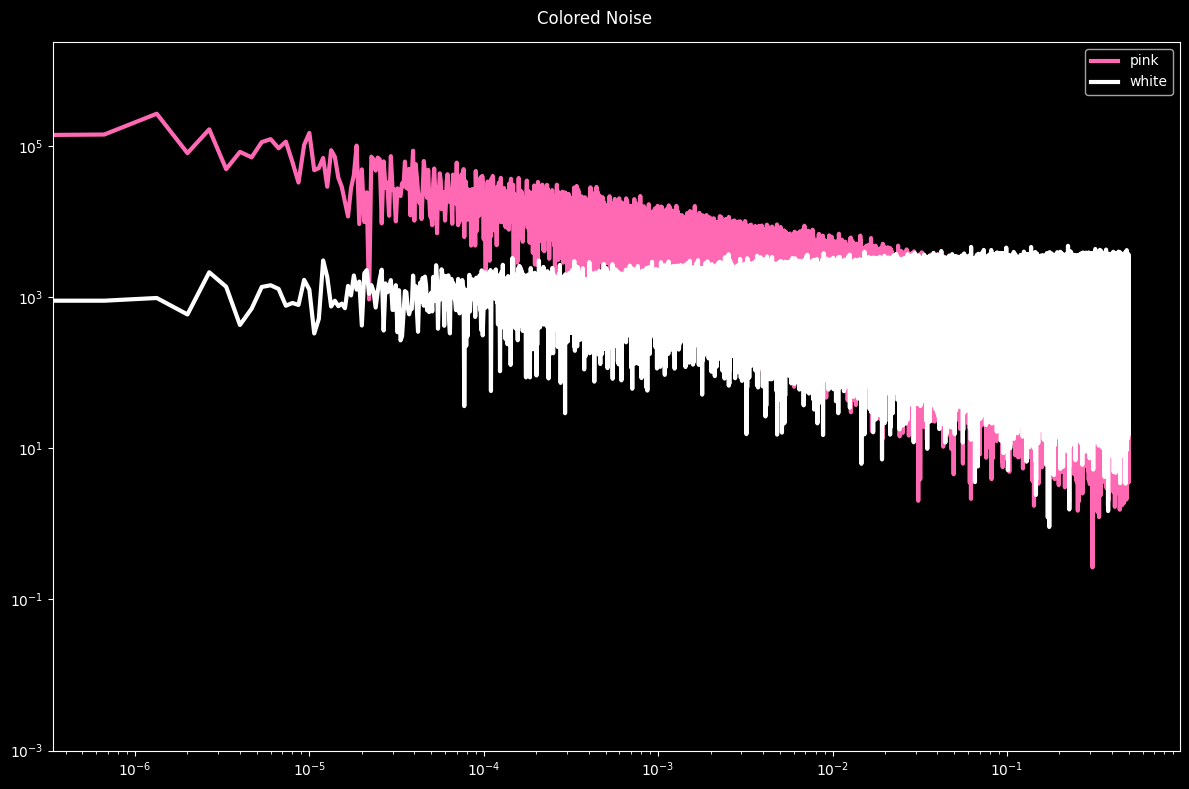

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_spectrum(s):
    f = np.fft.rfftfreq(len(s))
    #Se calcula la fft unilateral positiva de reales
    return plt.loglog(f, np.abs(np.fft.rfft(s)))[0]
    #Se retorna el grafico en escala logaritmica de las magnitudes
def noise_psd(N, psd = lambda f: 1):
        X_white = np.fft.rfft(np.random.randn(N));
        S = psd(np.fft.rfftfreq(N))
        # normalizar s
        S = S / np.sqrt(np.mean(S**2))
        X_shaped = X_white * S;
        return np.fft.irfft(X_shaped);
def PSDGenerator(f):
    return lambda N: noise_psd(N, f)
@PSDGenerator
def white_noise(f):
    return 1;

@PSDGenerator
def pink_noise(f):
    return 1/np.where(f == 0, float('inf'), np.sqrt(f)) #se evita div por cero
    #y se usa el decaimiento 1/f


plt.style.use('dark_background')
plt.figure(figsize=(12, 8), tight_layout=True)
for G, c in zip(
        [pink_noise, white_noise],
        ['hotpink', 'white']):
    plot_spectrum(G(30*50_000)).set(color=c, linewidth=3)
plt.legend(['pink', 'white'])
plt.suptitle("Colored Noise");
plt.ylim([1e-3, None]);


## 4. Referencias
<p align="justify">
    
[Generate colors of noise in Python] https://stackoverflow.com/questions/67085963/generate-colors-of-noise-in-python

[Generación de señales]https://medium.com/@martinkarlsson.io/fourier-transform-in-python-f15b3243ce9a

[Fourier Transform]https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html

[SciPy] https://docs.scipy.org/doc/scipy/tutorial/fft.html

[Fourier con numpy] https://towardsdatascience.com/fourier-transform-the-practical-python-implementation-acdd32f1b96a